# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Importing necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Making the CSV a DataFrame
df = pd.read_csv('/Users/dwreiter/Desktop/Work/Springboard/EDA_human_temperature/data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [2]:
# Find out Length, Mean, Standard Deviation and Median of Data
n = len(df['temperature'])
m = np.mean(df['temperature'])
sd = np.std(df['temperature'])
med = np.median(df['temperature'])

print('Length = ' + str(n) + ', Mean = ' + str(m) + ', Standard Deviation = ' + str(sd) + ', Median = ' + str(med))

Length = 130, Mean = 98.2492307692, Standard Deviation = 0.730357778905, Median = 98.3


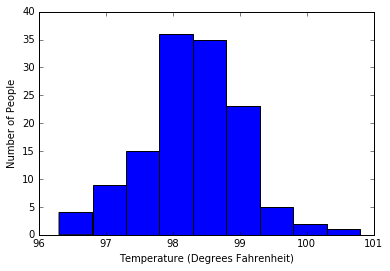

In [3]:
# Question One:

# Checking Normalcy of Data with Histogram
_ = plt.hist(df['temperature'], bins=9)
_ = plt.xlabel('Temperature (Degrees Fahrenheit)')
_ = plt.ylabel('Number of People')
plt.show()

The data appears fairly normal with the right side tailing off.

Question Two:

In order to meet the normalcy condition for inference on a mean, the sample size must be >= 30. In this case, n == 130 which is >= 30 so the sample size is large enough. Also, the observations appear to be independent as the values do not impact each other. Plus, the population size is certainly less than 10% of the total population of humans.

Question Three:

It would be best to use a One-Sample Test because we are comparing data to a single number.

Ho = m == 98.6 Degrees Fahrenheit,
Alpha = 0.05

In [4]:
# Setting the Null Hypothesis value to the expected mean population
mu = 98.6

# Finding the Standard Error
sem = sd / np.sqrt(n)
print('Standard Error: ' + str(sem))

Standard Error: 0.0640566146952


In [5]:
# Function that creates resampled array
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

# Function to draw Bootstrap Replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Generate random samples, shift mean and use function on data 
np.random.seed(42)

upgraded_temp = df['temperature'] - m + 98.6

upgraded_replicates = draw_bs_reps(upgraded_temp, np.mean, size=10000)

# Calculating p-value for replicates being less than or equal to Ho
p = np.sum(upgraded_replicates <= m) / len(upgraded_replicates)
print('p-value: ' + str(p))

p-value: 0


We can reject the Null Hypothesis because the p-value is less than Alpha so the true population mean != 98.6.

Now we will find the t-statistic and z-statistic as well as their p-values.

In [6]:
# Function to find t-statistic
def t_stat(data, mu=98.6):
    """Calculate t-statistic"""
    return (np.mean(data) - mu) / (np.std(data) / np.sqrt(len(data)))

# Calculates t-statistic
t_statistic = t_stat(df['temperature'], mu)

# Find p-value for t_statistic replicates being greater than or equal to population t-statistic
t_replicates = draw_bs_reps(upgraded_temp, t_stat, size=10000)
t_p = np.sum(np.abs(t_replicates) >= np.abs(t_statistic)) / len(t_replicates)

print('t-statistic: '+ str(t_statistic) + ', p-value: ' + str(t_p))

t-statistic: -5.47592520208, p-value: 0


In [7]:
# Function to find z-statistic
def z_stat(data, mu=98.6, sigma=0.7303577789050377):
    """Calculate z-statistic"""
    return (np.mean(data) - mu) / (sigma / np.sqrt(len(data)))

# Calculates z-statistic
z_statistic = z_stat(df['temperature'], mu)

# Find p-value for z_statistic replicates being greater than or equal to population z-statistic
z_replicates = draw_bs_reps(upgraded_temp, z_stat, size=10000)
z_p = np.sum(np.abs(z_replicates) >= np.abs(z_statistic)) / len(z_replicates)

print('z-statistic: '+ str(z_statistic) + ', p-value: '+ str(z_p))

z-statistic: -5.47592520208, p-value: 0


Both the t-statistic and z-statistic are the same because population size > 30 and we do not know the true population standard deviation.

In [8]:
# Question Four:

# Sample Data to a size of 10
np.random.seed(15)

sample = np.random.choice(df['temperature'], size=10)
sample

array([ 98.4,  97.9,  97.1,  98.7,  98.2,  98.4,  98.2,  98.8,  96.7,  96.4])

In [9]:
# Find out Length, Mean, Standard Deviation and Median of Sampled Data
sample_n = len(sample)
sample_m = np.mean(sample)
sample_sd = np.std(sample)
sample_med = np.median(sample)
print('Length = ' + str(sample_n) + ', Mean = ' + str(sample_m) + ', Standard Deviation = ' + str(sample_sd) + ', Median = ' + str(sample_med))

Length = 10, Mean = 97.88, Standard Deviation = 0.803492377064, Median = 98.2


In [10]:
# Shifting Mean
upgraded_sample = sample - sample_m + mu

# Finding the Standard Error of Sampled Data
sample_sem = sample_sd / np.sqrt(sample_n)
print('Standard Error: ' + str(sample_sem))

Standard Error: 0.254086599411


In [11]:
# Calculates t-statistic
sample_t_statistic = t_stat(sample, mu)

# Find p-value for t_statistic replicates being greater than or equal to population t-statistic
sample_t_replicates = draw_bs_reps(upgraded_sample, t_stat, size=10000)
sample_t_p = np.sum(np.abs(sample_t_replicates) >= np.abs(sample_t_statistic)) / len(sample_t_replicates)

print('t-statistic: '+ str(sample_t_statistic) + ', p-value: ' + str(sample_t_p))

t-statistic: -2.83367954733, p-value: 0


In [12]:
# Calculates z-statistic
sample_z_statistic = z_stat(sample, mu)

# Find p-value for z_statistic replicates being greater than or equal to population z-statistic
sample_z_replicates = draw_bs_reps(upgraded_sample, z_stat, size=10000)
sample_z_p = np.sum(np.abs(sample_z_replicates) >= np.abs(sample_z_statistic)) / len(sample_z_replicates)

print('z-statistic: '+ str(sample_z_statistic) + ', p-value: '+ str(sample_z_p))

z-statistic: -3.11743091001, p-value: 0


While the p-values are the same, the t-statistic and z-statistic are different because of the smaller sample size. Since the sample size is < 30, the t-statistic is preferable.

Question Five:
    
In order to find what temperatures would be abnormal, first we will create a 95% Confidence Interval of the Data.

In [13]:
# Computing 95% Confidence Interval
conf_int = np.percentile(df['temperature'], [2.5, 97.5])
print('95% of the data falls between ' + str(conf_int[0]) + ' and ' + str(conf_int[1]) + ' degrees Fahrenheit')

95% of the data falls between 96.7225 and 99.4775 degrees Fahrenheit


This means that there is a 95% chance that the true mean lies within 96.7225 and 99.4775 degrees Fahrenheit.

Now we will create a 95% Prediction Interval to see what temperatures would be considered abnormal.

In [14]:
# The z-score for a 95% Confidence Interval
z_score = 1.96

# Computing the Margin of Error by multiplying the Standard Error and the z-score
margin_error = sem * z_score
print('The Margin of Error is ' + str(margin_error))

The Margin of Error is 0.125550964803


In [15]:
# Formula to find 95% Prediction Interval
pred_int = z_score * sd / np.sqrt(1)
print('The 95% Prediction Interval is between ' + str(m - pred_int) + ' and ' + str(m + pred_int) + ' degrees Fahrenheit')

The 95% Prediction Interval is between 96.8177295226 and 99.6807320159 degrees Fahrenheit


This means that for a temperature to be abnormal, it would be below around 96.82 degrees Fahrenheit as well as above around 99.68 degrees Fahrenheit.

In [16]:
# Question Six:

# Getting Data by Gender and seeing the info for each
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

print(males.describe())
print(females.describe())

       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


In order to see if there is a significant difference between the temperatures of males and females, we will use a Two-Sample test because we are comparing two sets of data and I will set my Null Hypothesis to be that there is no significant statistical difference. 

Ho = No significant statistical difference in temperatures between males and females,
Alpha = 0.05

In [17]:
# Finding the Difference of Means between Males and Females.
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Computing the Test Statistic. Since Females have a higer mean, they are substracted from.
gender_diff = diff_of_means(females['temperature'], males['temperature'])

# Creating replicates 
g_replicates = np.empty(10000)
for i in range(len(g_replicates)):
    """Permuting Data"""
    gender_combined = np.concatenate((females['temperature'], males['temperature']))
    gender_perm = np.random.permutation(gender_combined)
    f_replicates = gender_perm[:len(females)]
    m_replicates = gender_perm[len(females):]
    # Drawing Replicates
    g_replicates[i] = diff_of_means(f_replicates, m_replicates)

# Calculating p-value for replicates being greater than or equal to the Observed Difference
    gender_p = np.sum(abs(g_replicates) >= abs(gender_diff)) / len(g_replicates)
print('Observed Difference between Genders: ' + str(gender_diff) + ', p-value: ' + str(gender_p))

Observed Difference between Genders: 0.289230769231, p-value: 0


We can reject the Null Hypothesis because the p-value is less than Alpha so that means there is a significant statistical differnece between the temperatures of males and females.

Conclusion:
In 1868, Carl Wunderlich proclaimed that the mean normal body temperature for a human was 98.6 degrees Fahrenheit. Instead, the mean normal body temperature I found was 98.2 +- 1.13 degrees Fahrenheit with a 95% confidence interval that the actual mean falls somehwere between 96.7225 and 99.4775 degrees Fahrenheit. Also, there is a statistically significant difference between the mean normal body temperature of males and females, specifically a difference of about 0.29 degrees Fahrenheit. That means females tend to have warmer normal body temperatures than males.